In [0]:
!pip install peqnp --install-option=pixie

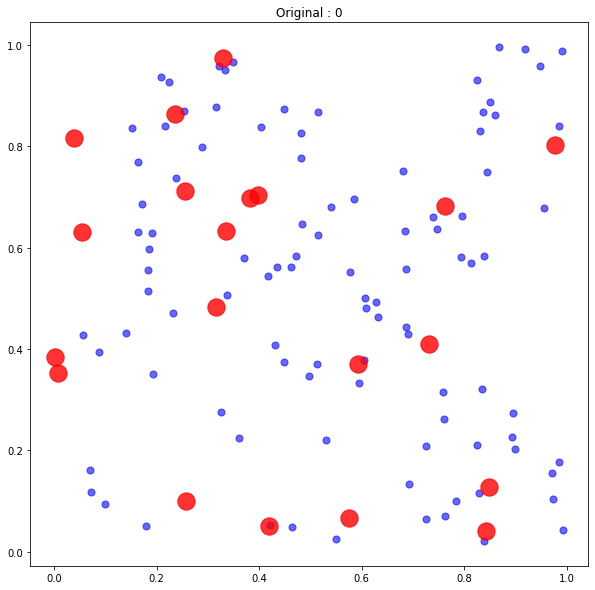

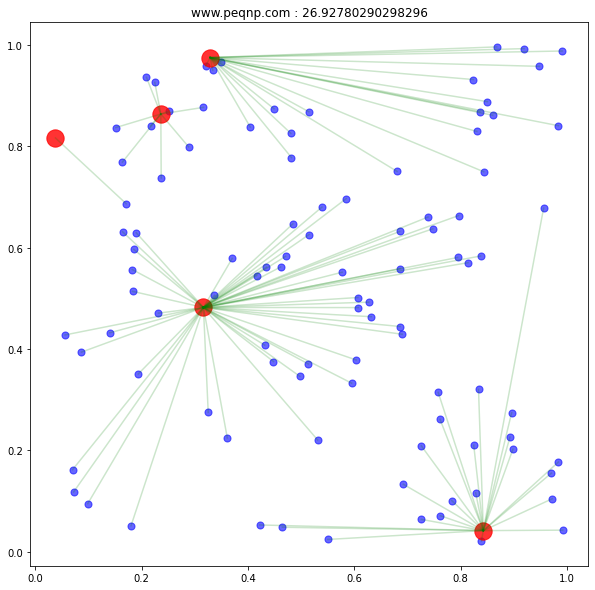

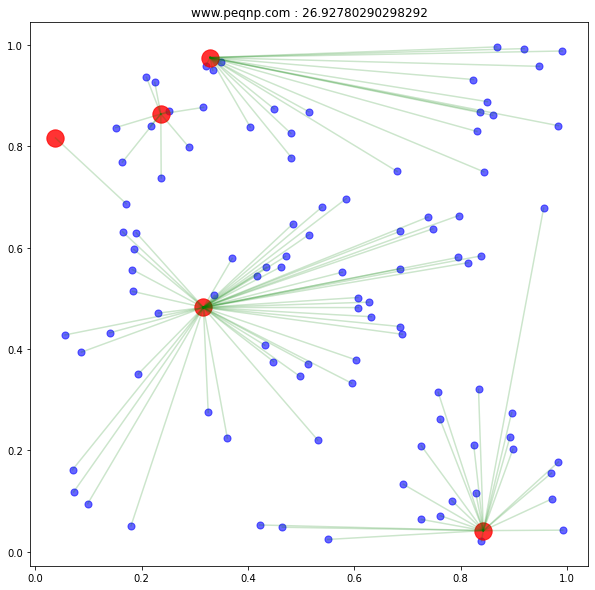

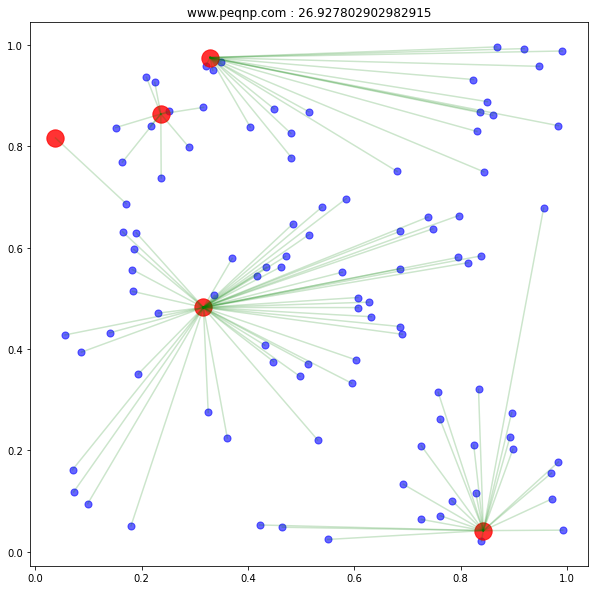

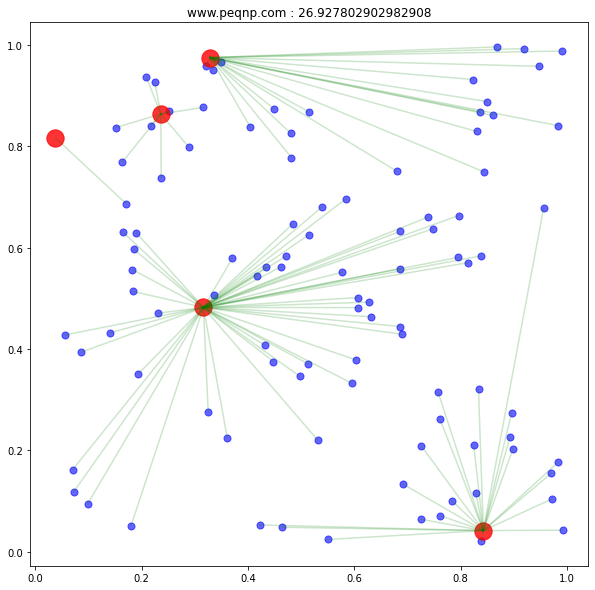

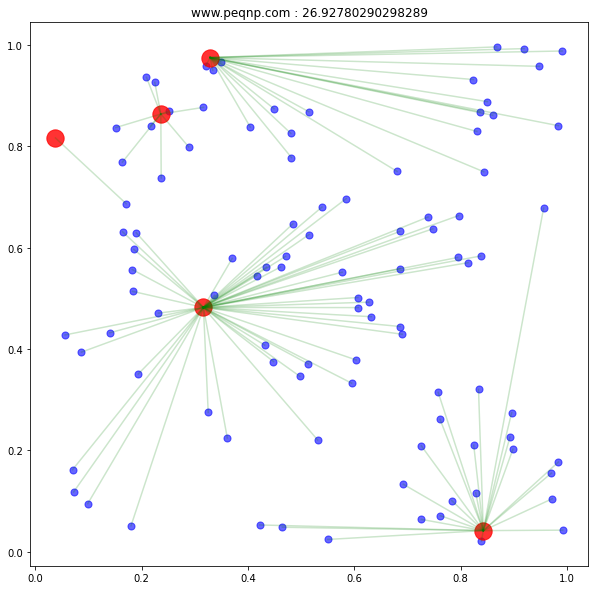

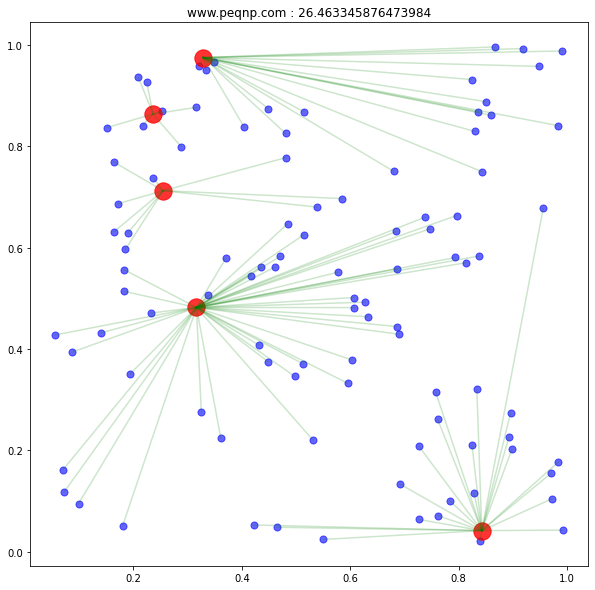

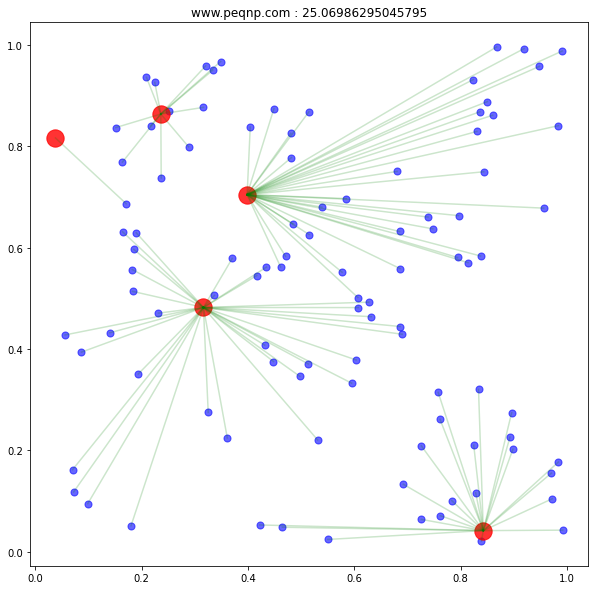

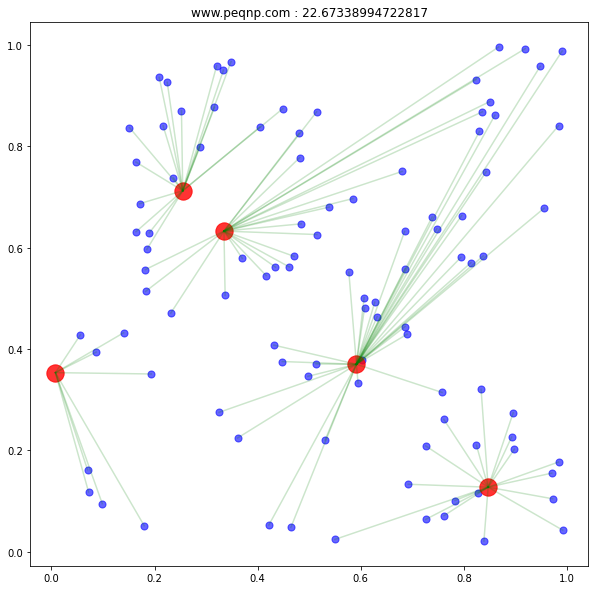

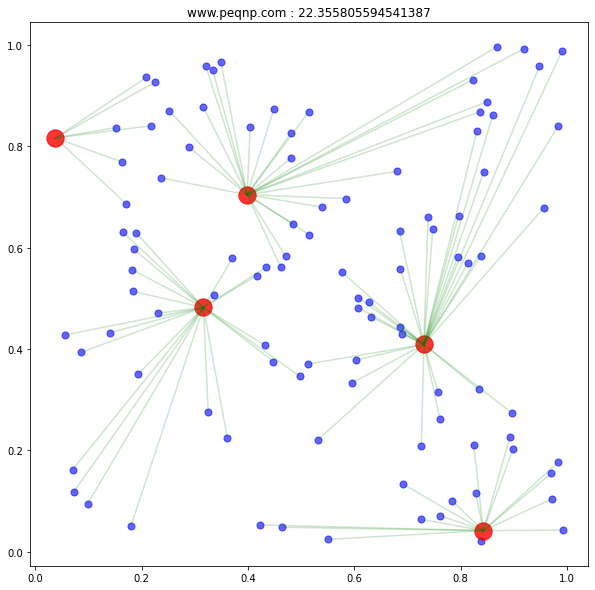

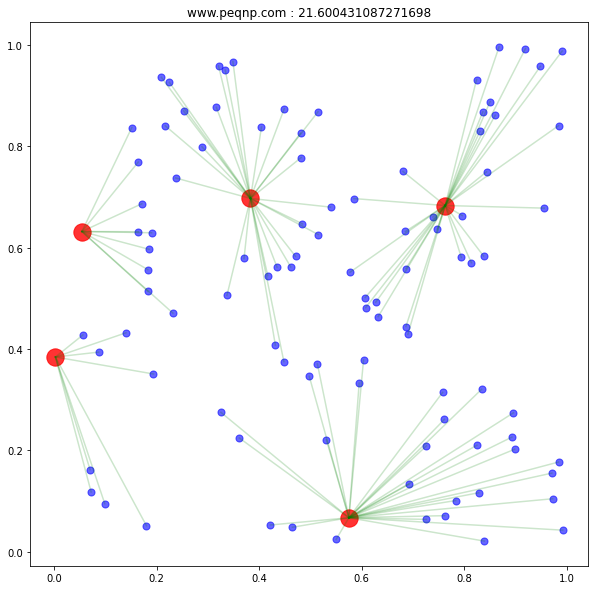

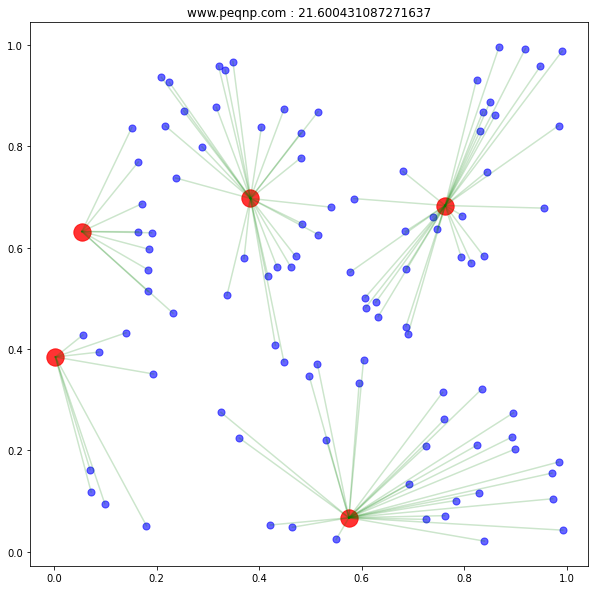

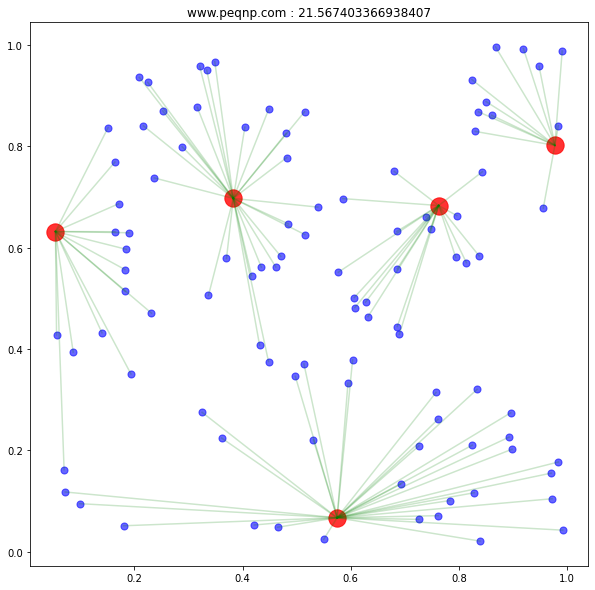

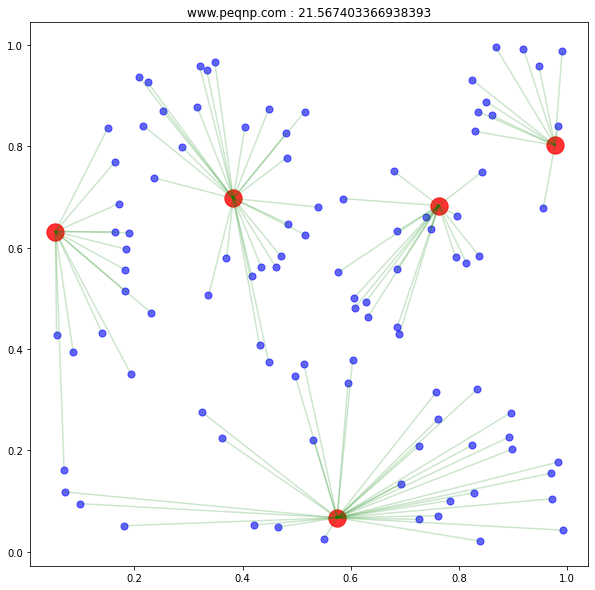

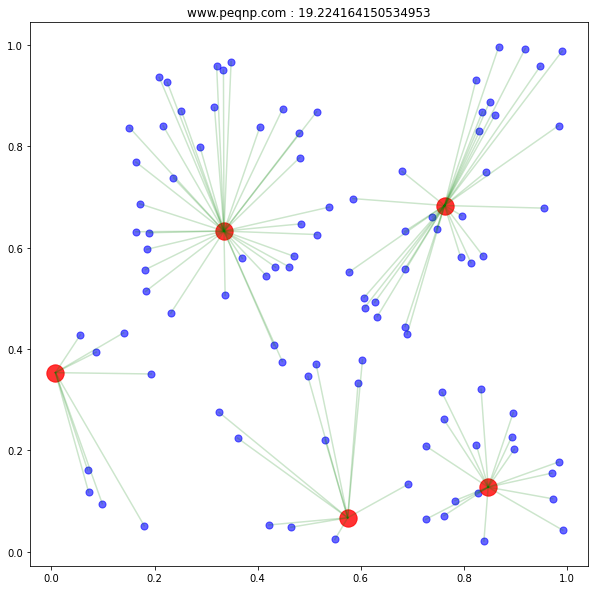

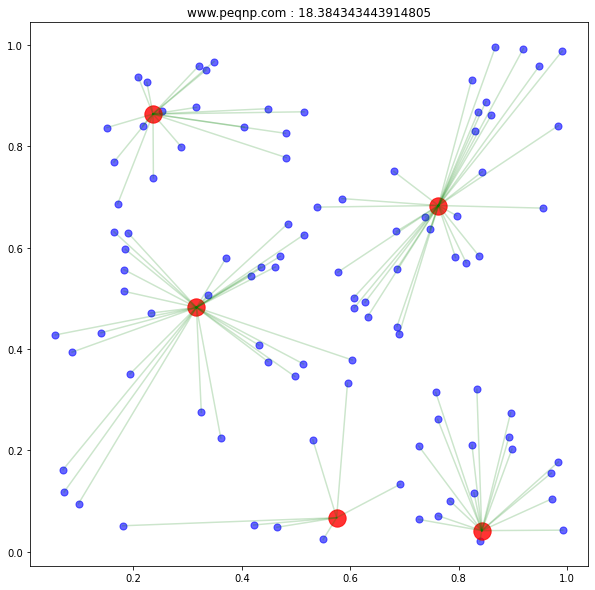

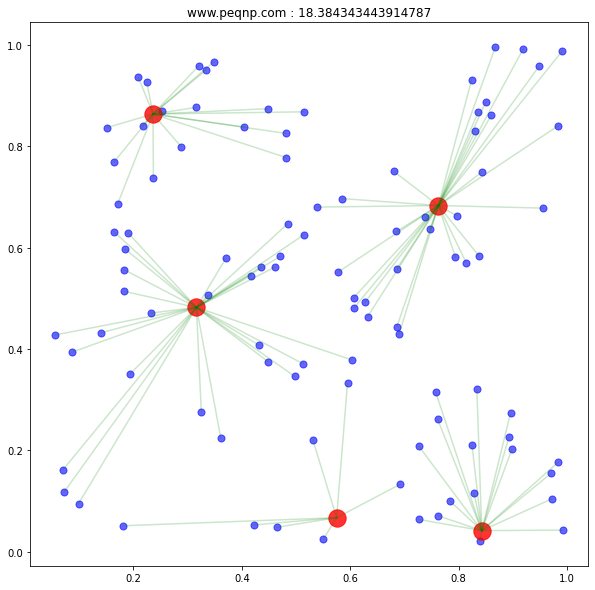

20 [18, 15, 2, 1, 0, 3, 5, 19, 14, 16, 17, 13, 12, 10, 9, 8, 7, 4, 6, 11]


In [3]:
import numpy as np
import peqnp as pn
import matplotlib.pyplot as plt


def plot(I, J=None, X=None, title='Original', obj=0):
    plt.figure(figsize=(10, 10))
    plt.title('{} : {}'.format(title, obj))
    a, b = zip(*I)
    plt.scatter(a, b, c='blue', s=50, alpha=0.6)
    if J is not None:
        if X is not None:
            for i in range(m):
                for j in range(n):
                    if X[i][j]:
                        plt.plot([I[i][0], J[j][0]], [I[i][1], J[j][1]], 'g-',alpha=0.2)
        a, b = zip(*J)
        plt.scatter(a, b, c='red', s=300, alpha=0.8)
    else:
        a, b = zip(*J)
        plt.scatter(a, b, c='red', s=300, alpha=0.8)
    plt.show()
    plt.close()


def oracle(seq):
    global O, glb, n
    M = np.zeros(shape=(m, n))
    for i in range(m):
        for j in range(n):
            M[i][j] = np.linalg.norm(I[i] - J[seq[j]])
    pn.engine()
    X = np.asarray(pn.matrix(dimensions=(m, n), is_mip=True))
    pn.all_binaries(X.flatten())
    assert sum(X.flatten()) == m
    assert (X.sum(axis=1) == 1).all()
    obj = pn.minimize(sum(X[i][j] * M[i][j] for i in range(m) for j in range(n)))
    O = np.vectorize(int)(X)
    if obj < glb:
        glb = obj
        plot(I, J[seq][:n], O, 'www.peqnp.com', oracle(seq))
    return obj


if __name__ == '__main__':

    glb = np.inf

    m = 100
    k = 20
    n = 5
    I = np.random.sample(size=(m, 2))    
    J = np.random.sample(size=(k, 2))
    plot(I, J)
    seq = pn.hess_sequence(k, oracle=oracle, fast=False)
    print(k, seq)

In [4]:
"""
Copyright (c) 2012-2020 PEQNP. all rights reserved. contact@peqnp.science

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
"""

'\nCopyright (c) 2012-2020 PEQNP. all rights reserved. contact@peqnp.science\n\nPermission is hereby granted, free of charge, to any person obtaining a copy\nof this software and associated documentation files (the "Software"), to deal\nin the Software without restriction, including without limitation the rights\nto use, copy, modify, merge, publish, distribute, sublicense, and/or sell\ncopies of the Software, and to permit persons to whom the Software is\nfurnished to do so, subject to the following conditions:\n\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\n\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,\nFITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE\nAUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER\nLIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT